# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline
import datetime as dt

from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

## Loading Dataset 

In [2]:
df = pd.read_excel(r'E-com_Data.xlsx')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


### Metadata

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [4]:
df.nunique() # Checking number of unique values

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [5]:
df.isnull().sum() # Checking for number of null values

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [6]:
df.shape

(537979, 12)

### Checking for duplicate rows

In [7]:
df[df.duplicated()]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36,NaN,NaN,NaN


In [8]:
df1 = df.drop_duplicates(ignore_index=True) # droping duplicate value

In [9]:
df1.shape

(537970, 12)

In [10]:
df1 = df1.dropna(subset=['CustomerID']) # Droping null values from CustomerID

In [11]:
df1.shape

(404181, 12)

In [12]:
print('Latest purchase date: {}\nEarliest purchase Date: {}'.format(max(df1['Date of purchase']),min(df1['Date of purchase'])))

Latest purchase date: 2017-12-19 00:00:00
Earliest purchase Date: 2016-12-02 00:00:00


In [13]:
latest_date = dt.datetime(2017,12,20) 

In [14]:
df1['numberofrows'] = 1

### Creating RMF table

In [15]:
RMF_tab = df1.pivot_table(index='CustomerID',aggfunc={'Date of purchase':max,'numberofrows':sum,'Price':sum})
RMF_tab['Date of purchase'] = -(RMF_tab['Date of purchase']-latest_date).dt.days
RMF_tab.rename(columns={'Date of purchase':'Recency','Price':'Monetary','numberofrows':'Frequency'},inplace=True)
RMF_tab.reset_index().head()

,CustomerID,Recency,Monetary,Frequency
0,2.0,4,553704.0,182
1,3.0,77,257404.0,27
2,4.0,19,176613.0,72
3,5.0,311,41976.0,16
4,6.0,37,151822.0,84


In [16]:
quantiles = RMF_tab.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [17]:
# Creating function to rank Customer based on R & MF (Recency, Monetary, Frequency)
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x<= d[p][0.5]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [18]:
# Applying the function to create ranks
RMF_tab['R'] = RMF_tab['Recency'].apply(RScoring,args=('Recency',quantiles,))
RMF_tab['F'] = RMF_tab['Frequency'].apply(FMScoring,args=('Frequency',quantiles,))
RMF_tab['M'] = RMF_tab['Monetary'].apply(FMScoring,args=('Monetary',quantiles,))

In [19]:
RMF_tab.head()

,Recency,Monetary,Frequency,R,F,M
CustomerID,,,,,,
2.0,4,553704.0,182,1,1,1
3.0,77,257404.0,27,3,3,1
4.0,19,176613.0,72,2,2,2
5.0,311,41976.0,16,4,4,3
6.0,37,151822.0,84,2,2,2


In [20]:
RMF_tab['RMF'] = RMF_tab['R'].astype('str')+RMF_tab['F'].astype('str')+RMF_tab['M'].astype('str')

In [21]:
RMF_tab['RMFscore'] = RMF_tab['R']+RMF_tab['F']+RMF_tab['M']

In [22]:
RMF_tab.head()

,Recency,Monetary,Frequency,R,F,M,RMF,RMFscore
CustomerID,,,,,,,,
2.0,4,553704.0,182,1,1,1,111,3
3.0,77,257404.0,27,3,3,1,331,7
4.0,19,176613.0,72,2,2,2,222,6
5.0,311,41976.0,16,4,4,3,443,11
6.0,37,151822.0,84,2,2,2,222,6


In [23]:
# Creating loyalty level column for better understanding 
Loyalty_level = ['Diamond','Platinum','Gold','Silver']
score_cuts = pd.qcut(RMF_tab.RMFscore,q=4,labels=Loyalty_level)
RMF_tab['RMF_Loyalty_Level'] = score_cuts.values
RMF_tab.reset_index(inplace=True)

In [24]:
# Replacing negative and zero
RMF_tab['Monetary'] = list(map(lambda x: 1 if x <=0
                             else x,RMF_tab['Monetary']))

In [25]:
# Creating dataset for clustering
X = RMF_tab[['Recency','Frequency','Monetary']]
X.head()

,Recency,Frequency,Monetary
0,4,182,553704.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


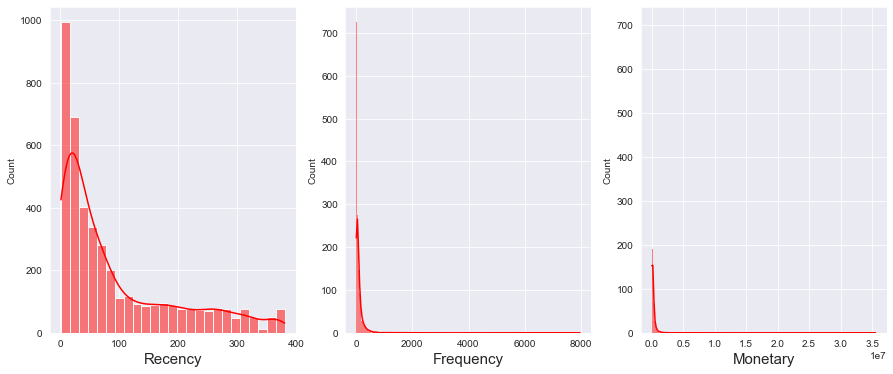

In [26]:
# Distribution of features
cols = X.columns
plt.figure(figsize=(15,6))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.histplot(data=X,x=cols[i],kde=True,color='r')
    plt.xlabel(cols[i],fontsize=15)

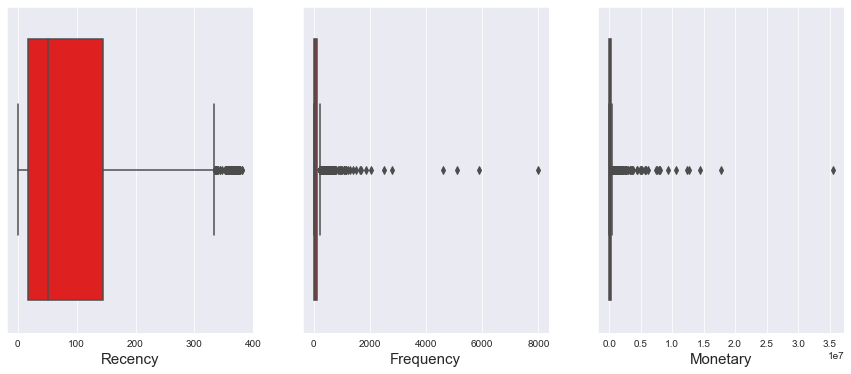

In [27]:
cols = X.columns
plt.figure(figsize=(15,6))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=X,x=cols[i],color='r')
    plt.xlabel(cols[i],fontsize=15)

## Feature Scaling

In [28]:
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,index=X.index,columns=X.columns)
X_scaled.head()

,Recency,Frequency,Monetary
0,-0.886877,0.383795,0.377669
1,-0.161877,-0.284135,0.031987
2,-0.737904,-0.090220,-0.062268
3,2.162093,-0.331537,-0.219344
4,-0.559137,-0.038510,-0.091191


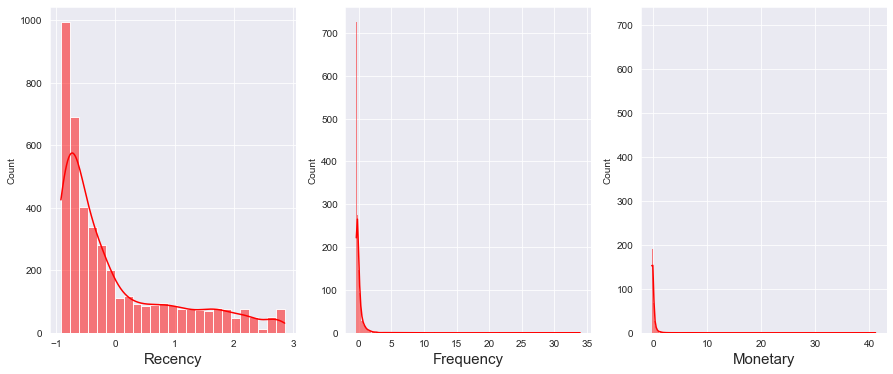

In [29]:
cols = X_scaled.columns
plt.figure(figsize=(15,6))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.histplot(data=X_scaled,x=cols[i],kde=True,color='r')
    plt.xlabel(cols[i],fontsize=15)

## Creating Clustering Model

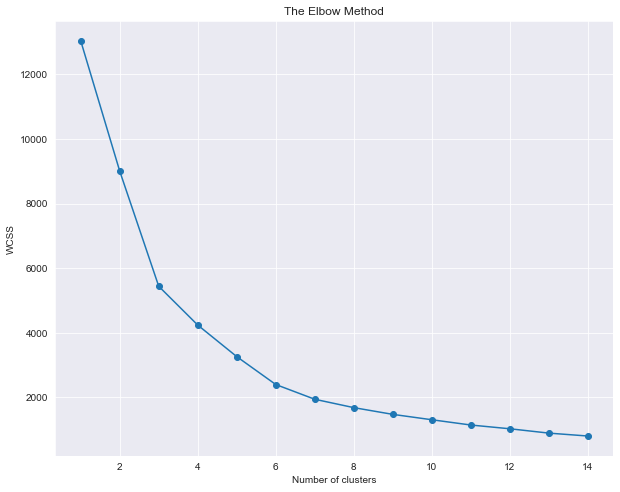

In [30]:
plt.figure(figsize=(10, 8))
wcss = []
K = range(1, 15)
for i in K:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(K, wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4,init='k-means++', random_state=300)
cluster = kmeans.fit_predict(X_scaled)
RMF_tab['Label'] = kmeans.labels_
RMF_tab.head()

,CustomerID,Recency,Monetary,Frequency,R,F,M,RMF,RMFscore,RMF_Loyalty_Level,Label
0,2.0,4,553704.0,182,1,1,1,111,3,Diamond,1
1,3.0,77,257404.0,27,3,3,1,331,7,Platinum,1
2,4.0,19,176613.0,72,2,2,2,222,6,Platinum,1
3,5.0,311,41976.0,16,4,4,3,443,11,Silver,0
4,6.0,37,151822.0,84,2,2,2,222,6,Platinum,1


In [32]:
RMF_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         4349 non-null   float64 
 1   Recency            4349 non-null   int64   
 2   Monetary           4349 non-null   float64 
 3   Frequency          4349 non-null   int64   
 4   R                  4349 non-null   int64   
 5   F                  4349 non-null   int64   
 6   M                  4349 non-null   int64   
 7   RMF                4349 non-null   object  
 8   RMFscore           4349 non-null   int64   
 9   RMF_Loyalty_Level  4349 non-null   category
 10  Label              4349 non-null   int32   
dtypes: category(1), float64(2), int32(1), int64(6), object(1)
memory usage: 327.3+ KB


In [33]:
Pivot_tab = RMF_tab.pivot_table(index='Label', aggfunc={'Recency':'mean',
                                           'Frequency':'mean',
                                           'Monetary':'mean',
                                           'CustomerID':'nunique'}).reset_index()
Pivot_tab.rename(columns={'CustomerID':'NoOfBuyers'},inplace=True)
Pivot_tab

,Label,NoOfBuyers,Frequency,Monetary,Recency
0,0,1095,28.026484,5.794158e+04,247.969863
1,1,3239,104.125965,2.375828e+05,41.416178
2,2,11,1151.818182,1.216187e+07,6.818182
3,3,4,5889.500000,8.363220e+06,2.500000


In [34]:
Pivot_tab['Percent'] = round(Pivot_tab['NoOfBuyers']*100/(Pivot_tab['NoOfBuyers'].sum()),2)
Pivot_tab

,Label,NoOfBuyers,Frequency,Monetary,Recency,Percent
0,0,1095,28.026484,5.794158e+04,247.969863,25.18
1,1,3239,104.125965,2.375828e+05,41.416178,74.48
2,2,11,1151.818182,1.216187e+07,6.818182,0.25
3,3,4,5889.500000,8.363220e+06,2.500000,0.09


In [35]:
RMF_tab.to_excel('Output_Cluster.xlsx')

- Cluster 0 -> Gold,Platinum,Silver | Avg Monetary: 57941.58 | Avg Freq: 28| {max:321,min:1}
- Cluster 1 -> Diamond,Gold,Platinum,Silver | Avg Monetary: 237582.78 | Avg Freq: 104| {max:2779,min:1}
- Cluster 2 -> Diamond | Avg Monetary: 12161872.64 | Avg Freq:1151| {max:263,min:2489}
- Cluster 3 -> Diamond | Avg Monetary: 8363219.75 | Avg Freq: 5889| {max:4615,min:7970}